# Experiments on multithread execution

In [1]:
import subprocess
import time 
import os
import pickle
import multiprocessing
from collections import namedtuple

def timing_run(cmd: str, n=1, env=None):
    assert n > 0
    data = None
    ts = time.time()
    for _ in range(n):
        cmd = cmd.split()
        data = subprocess.run(cmd, env=env, capture_output=True)
    te = time.time()
    return (te - ts)/n, data

In [2]:
work_dir="/home/ck/raul"
repeat = 10
max_threads = 45 #multiprocessing.cpu_count()//2
Data = namedtuple("Data", ["threads", "timing", "status"])

data = []

for r in range(repeat):
    print(f"# iteration: {r}")
    for threads in range(1,max_threads+1):
        print(f"checking threads={threads}")
        env = {
            **os.environ,
            "OMP_NUM_THREADS": str(threads),
            "RAUL_ASSETS": f"{work_dir}/testAssets"
        }

        timing, result = timing_run(f"{work_dir}/build/RaulTests --gtest_filter=TestOptimizerAdam.ToyNetTraining", env=env)
        data.append(Data(threads=threads, timing=timing, status=result.returncode))
    pickle.dump(data, open(f"timing_experiment_checkpoint_{r}.p", "wb"))

# iteration: 0
checking threads=1
checking threads=2
checking threads=3
checking threads=4
checking threads=5
checking threads=6
checking threads=7
checking threads=8
checking threads=9
checking threads=10
checking threads=11
checking threads=12
checking threads=13
checking threads=14
checking threads=15
checking threads=16
checking threads=17
checking threads=18
checking threads=19
checking threads=20
checking threads=21
checking threads=22
checking threads=23
checking threads=24
checking threads=25
checking threads=26
checking threads=27
checking threads=28
checking threads=29
checking threads=30
checking threads=31
checking threads=32
checking threads=33
checking threads=34
checking threads=35
checking threads=36
checking threads=37
checking threads=38
checking threads=39
checking threads=40
checking threads=41
checking threads=42
checking threads=43
checking threads=44
checking threads=45
# iteration: 1
checking threads=1
checking threads=2
checking threads=3
checking threads=4
che

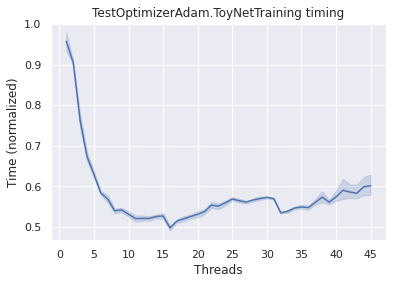

In [11]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

df = pd.DataFrame(data)
df["timing"] = df["timing"] / df["timing"].max()
ax = sns.lineplot(x="threads", y="timing", data=df)
ax.set_title("TestOptimizerAdam.ToyNetTraining timing")
ax.set_ylabel("Time (normalized)")
ax.set_xlabel("Threads")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig = ax.get_figure()
fig.savefig("timing_experiments.png")